In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [2]:
user_ids = np.load('./data/user_ids.npy')
book_ids = np.load('./data/book_ids.npy')
encode_books = pd.read_csv('./data/encode_books.csv')
books = pd.read_csv('./data/books.csv')

In [3]:
train_ratings = pd.read_csv('./data/train_ratings.csv')
test_ratings = pd.read_csv('./data/test_ratings.csv')

In [4]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
books[['id', 'authors', 'original_publication_year', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].head()

,id,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


In [6]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [7]:
user_ids.shape, book_ids.shape

((53382,), (10000,))

In [8]:
train_ratings.shape[0] + test_ratings.shape[0]

979436

In [9]:
years = books['original_publication_year'].values

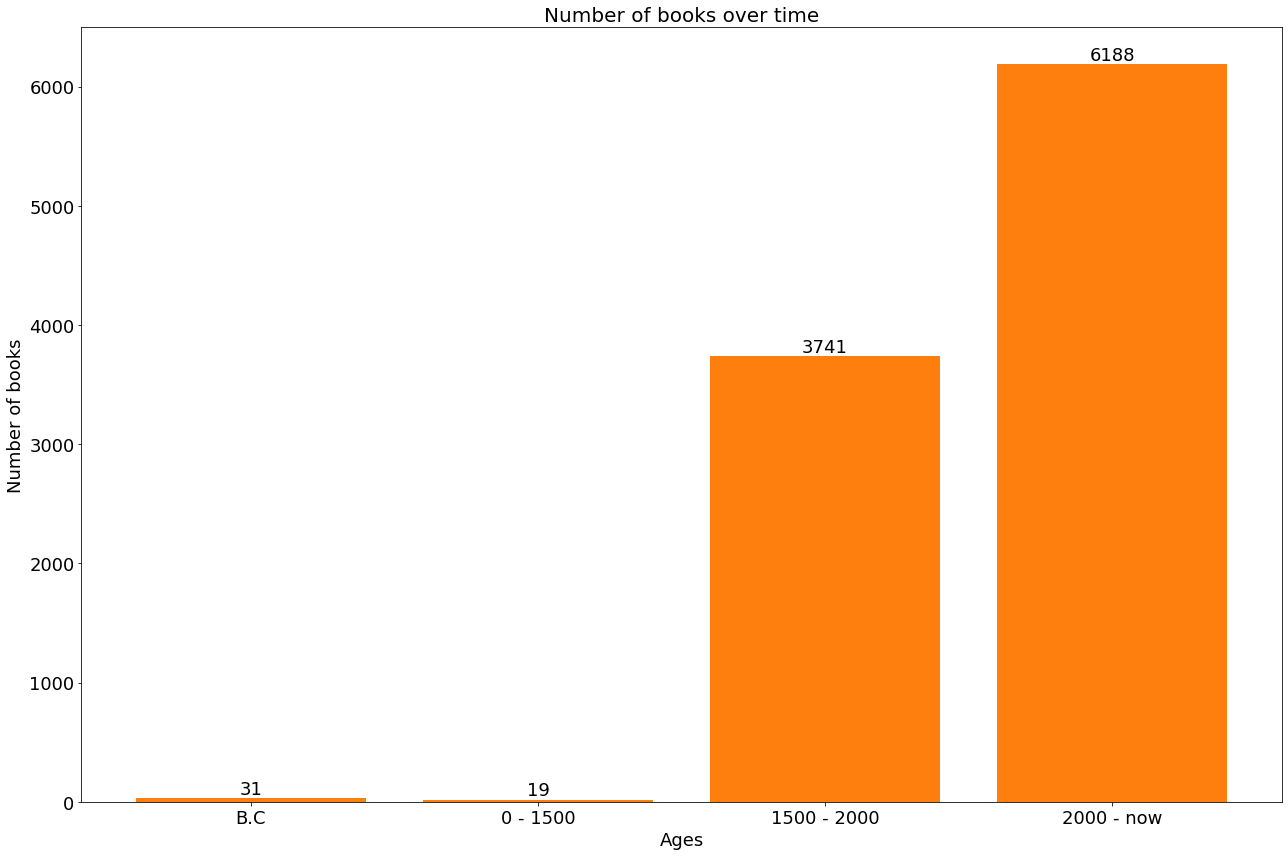

In [10]:
plt.figure(figsize=(18, 12))
bar = plt.bar(
    x=['B.C', '0 - 1500', '1500 - 2000', '2000 - now'],
    height=[31, 19, 3741, 6188],
    color='tab:orange'
)
plt.gca().bar_label(bar, fontsize=18)
plt.title('Number of books over time', fontsize=20)
plt.ylabel('Number of books', fontsize=18)
plt.xlabel('Ages', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('./plot/Number of books over time.jpg')
plt.show()

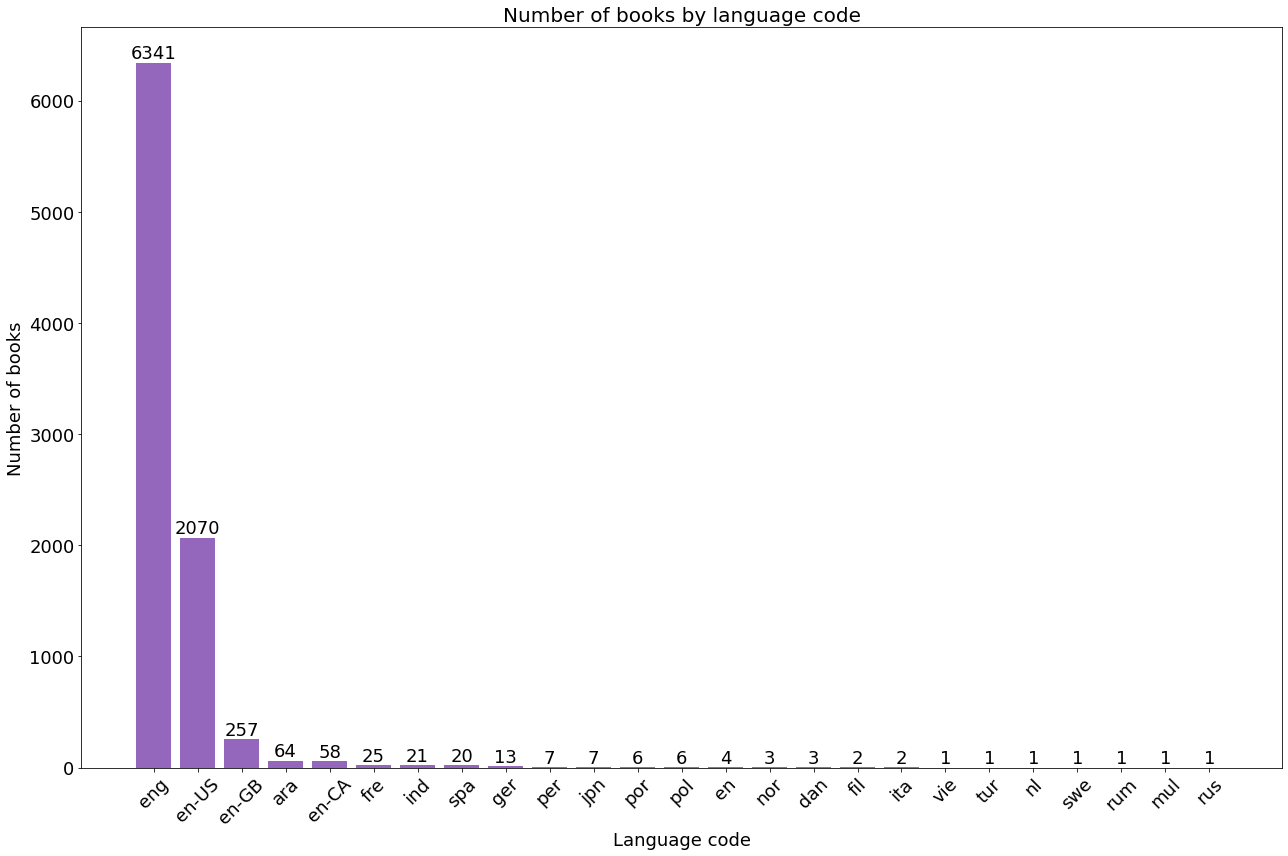

In [11]:
plt.figure(figsize=(18, 12))
count = books['language_code'].value_counts()
bar = plt.bar(
    x=count.index,
    height=count.values,
    color='tab:purple'
)
plt.gca().bar_label(bar, fontsize=18)
plt.title('Number of books by language code', fontsize=20)
plt.ylabel('Number of books', fontsize=18)
plt.xlabel('Language code', fontsize=18)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('./plot/Number of books by language code.jpg')
plt.show()

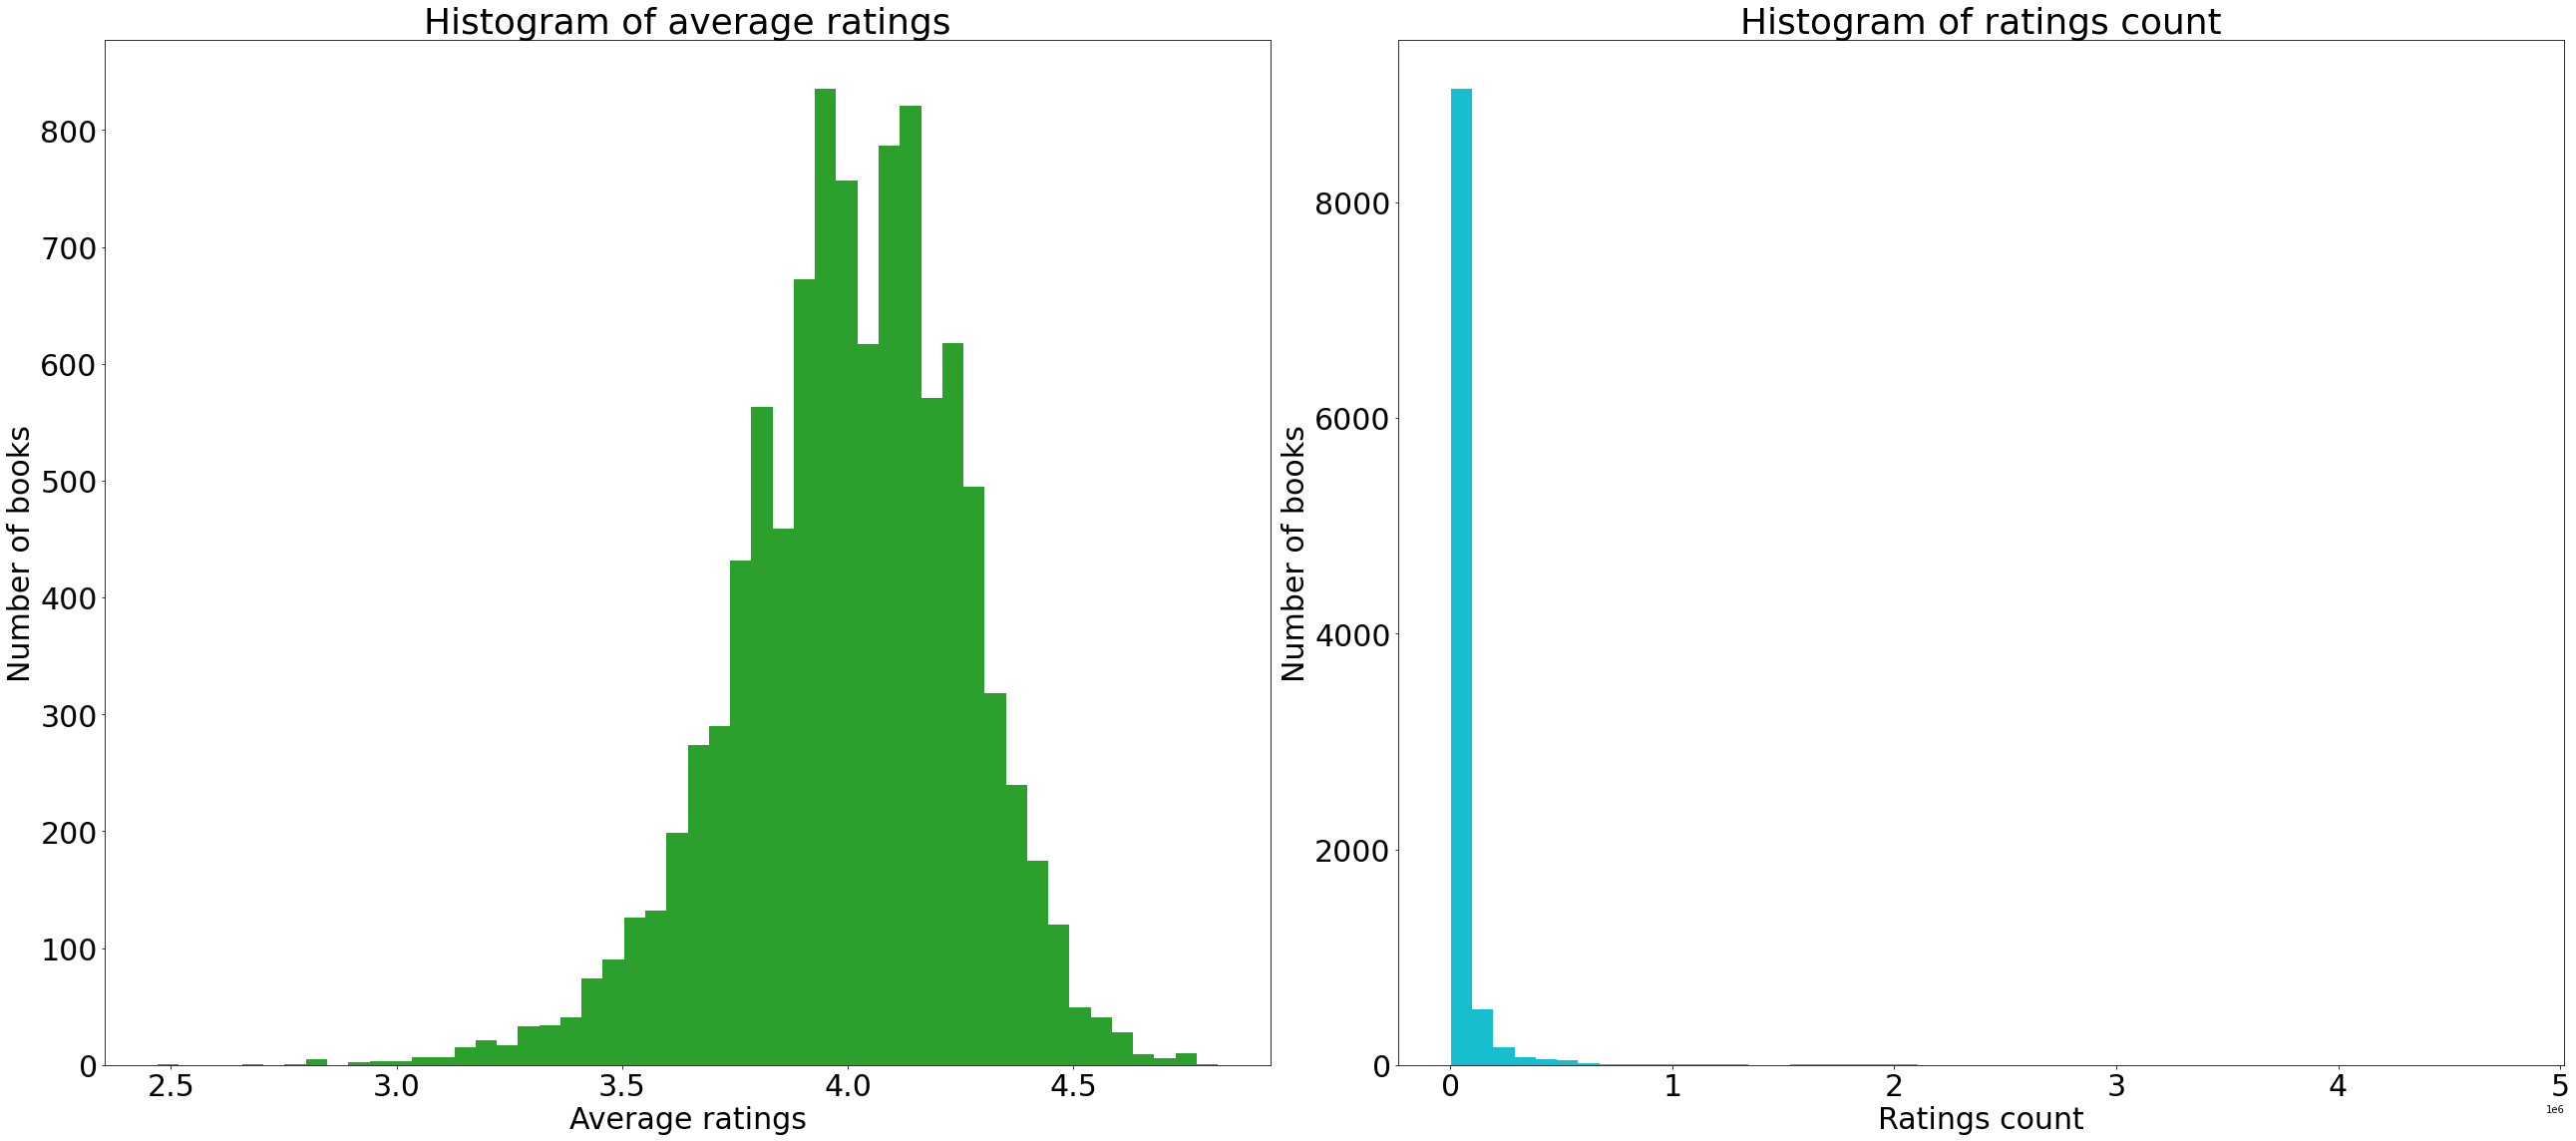

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(36)

ax[0].hist(books['average_rating'], bins=50, color='tab:green')
ax[0].set_title('Histogram of average ratings', fontsize=36)
ax[0].set_xlabel('Average ratings', fontsize=30)
ax[0].set_ylabel('Number of books', fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=30)

ax[1].hist(books['ratings_count'], bins=50, color='tab:cyan')
ax[1].set_title('Histogram of ratings count', fontsize=36)
ax[1].set_xlabel('Ratings count', fontsize=30)
ax[1].set_ylabel('Number of books', fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('./plot/Histogram of average ratings and ratings count.jpg')
plt.show()

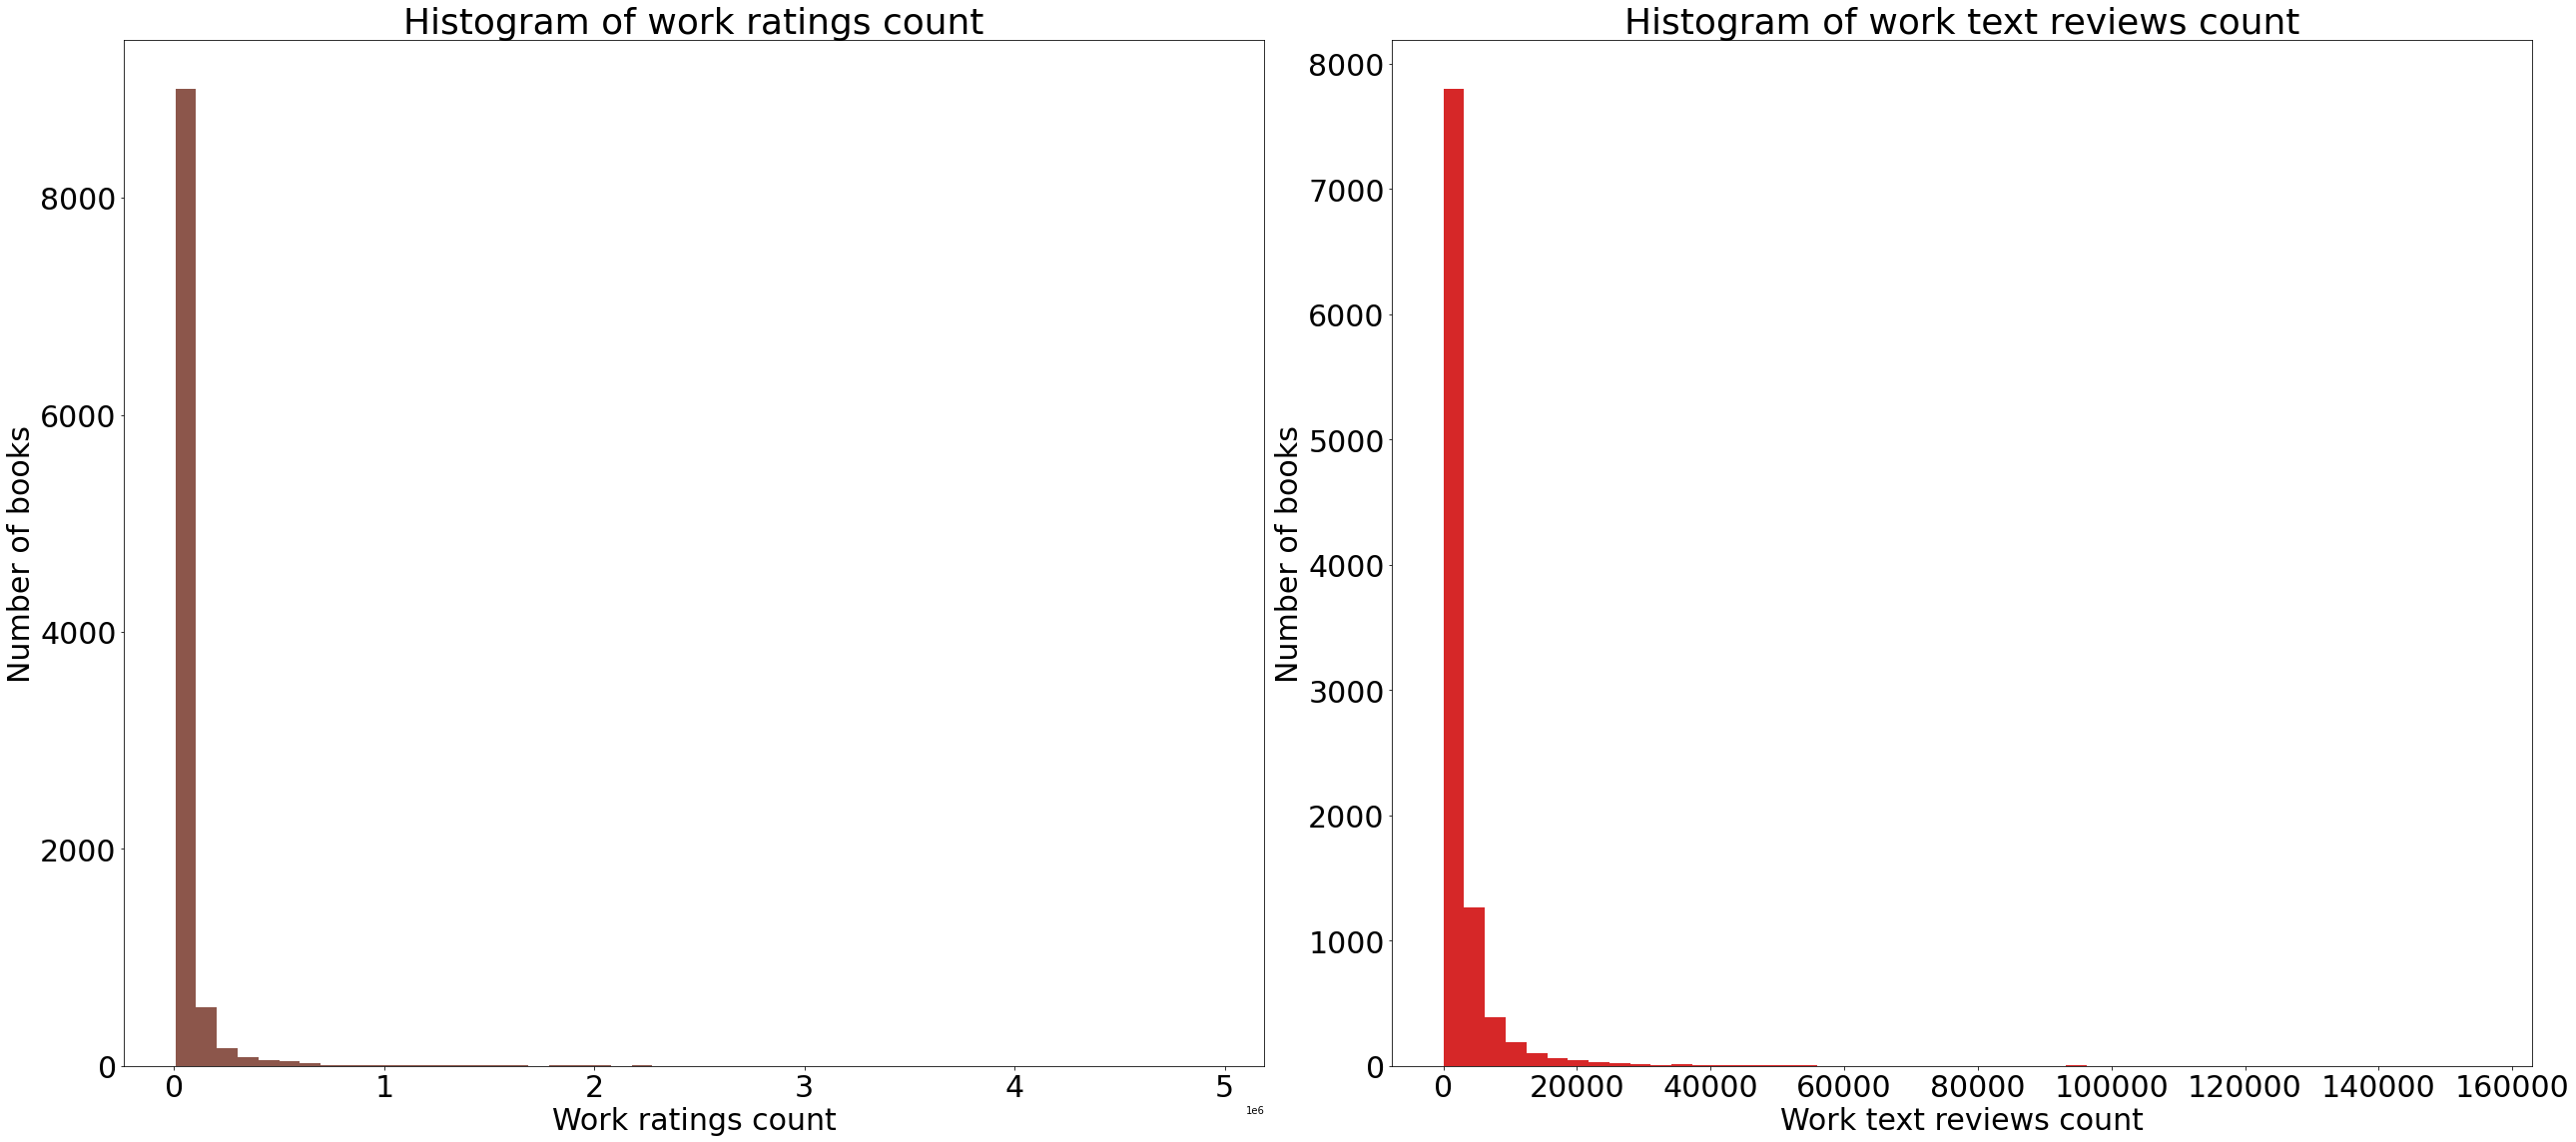

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(36)

ax[0].hist(books['work_ratings_count'], bins=50, color='tab:brown')
ax[0].set_title('Histogram of work ratings count', fontsize=36)
ax[0].set_xlabel('Work ratings count', fontsize=30)
ax[0].set_ylabel('Number of books', fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=30)

ax[1].hist(books['work_text_reviews_count'], bins=50, color='tab:red')
ax[1].set_title('Histogram of work text reviews count', fontsize=36)
ax[1].set_xlabel('Work text reviews count', fontsize=30)
ax[1].set_ylabel('Number of books', fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('./plot/Histogram of work ratings count and work text reviews count.jpg')
plt.show()

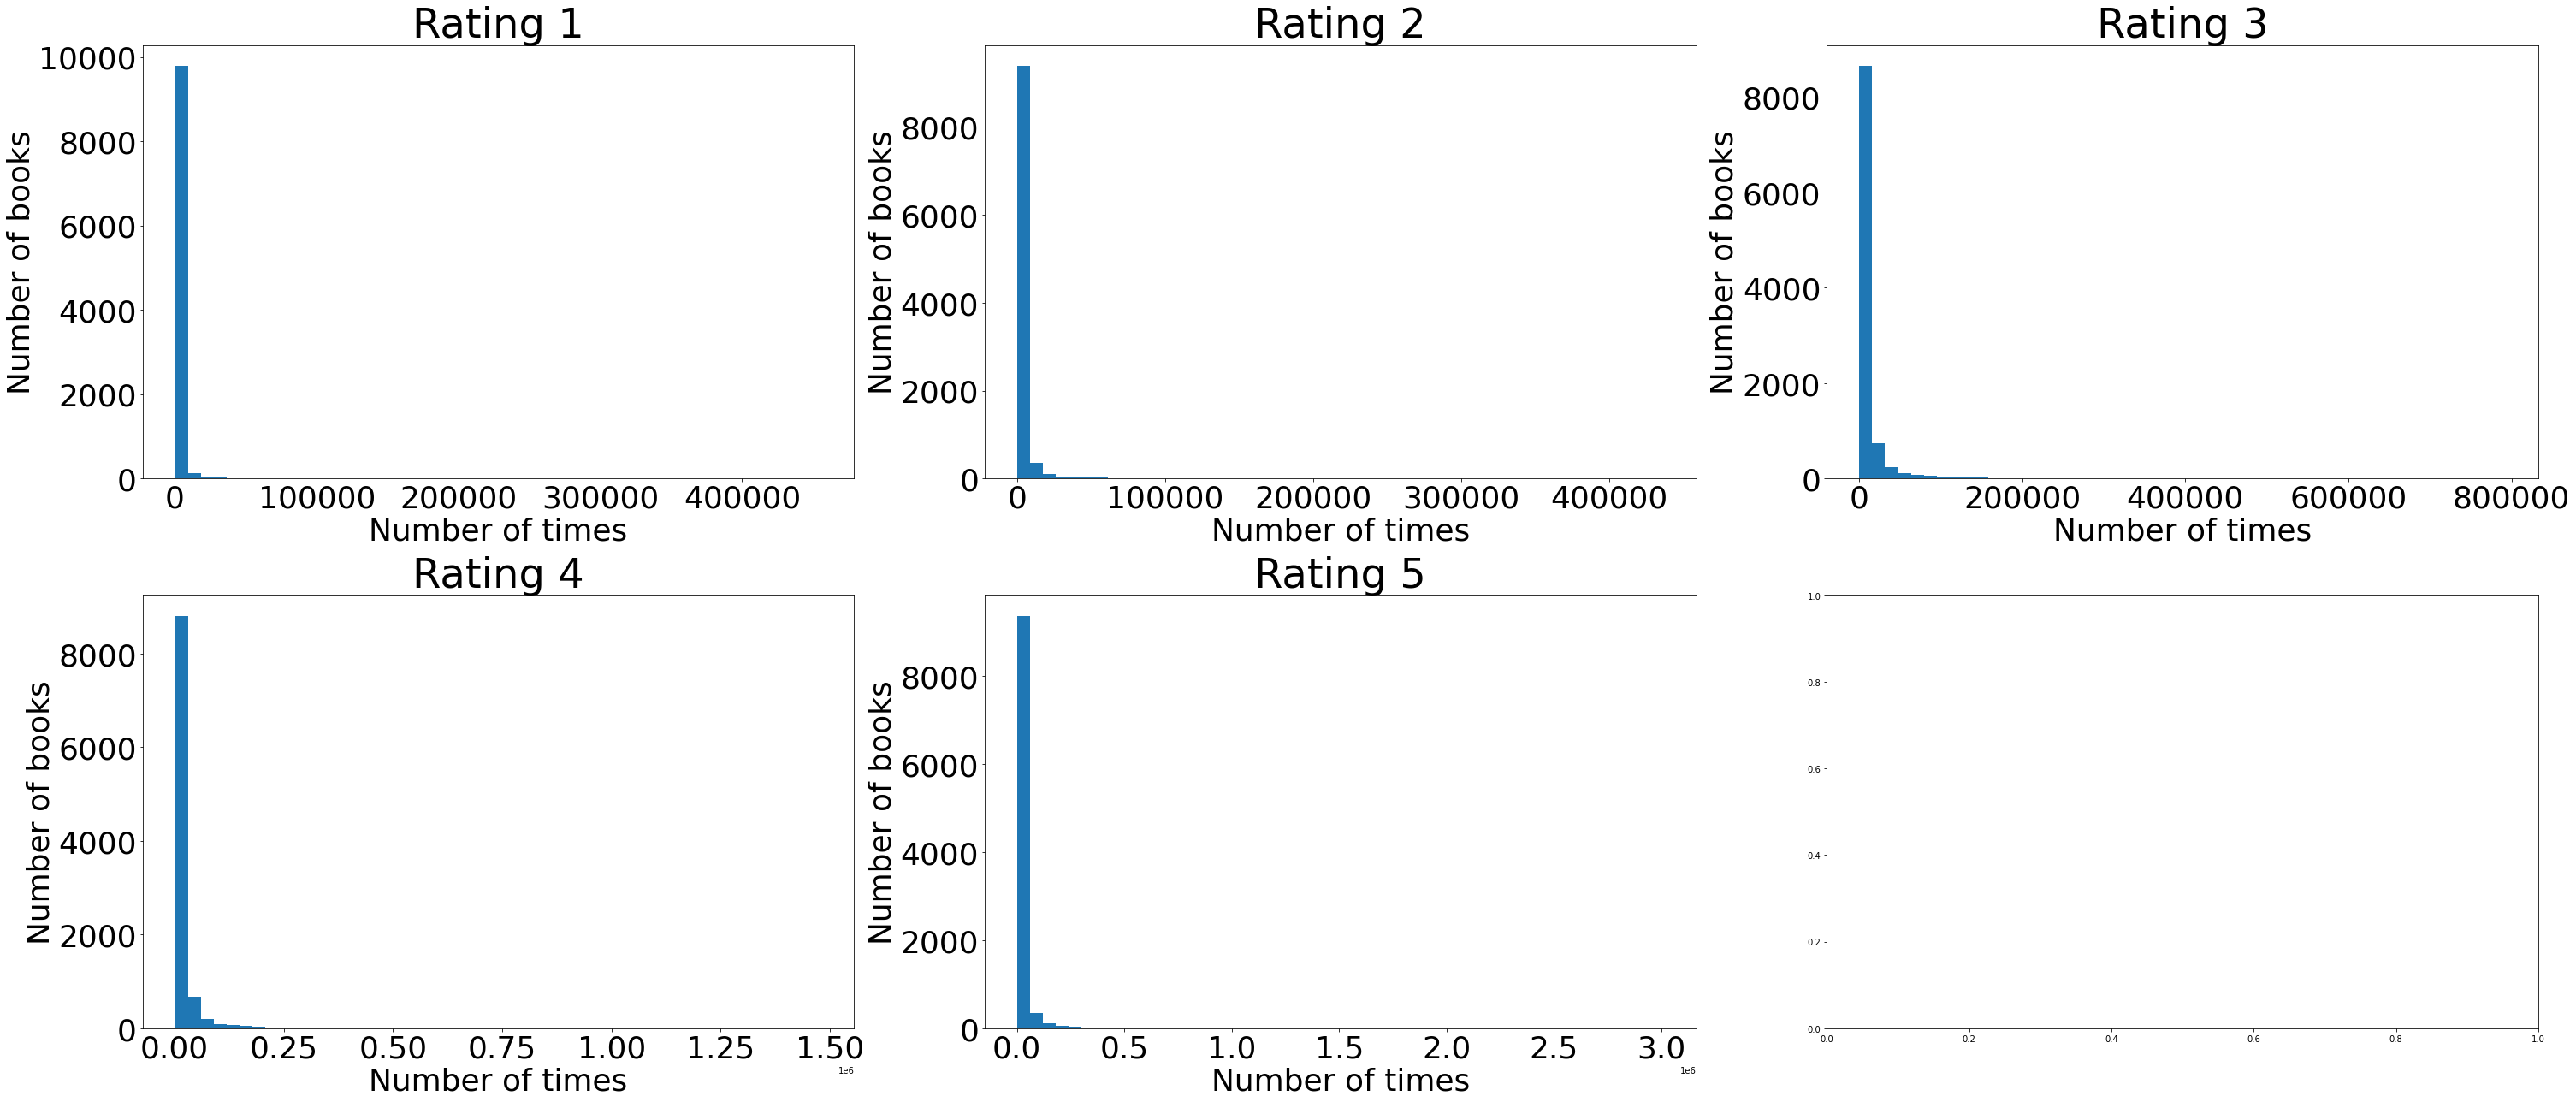

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(18)
fig.set_figwidth(42)

ax[0, 0].hist(books['ratings_1'], bins=50, color='tab:blue')
ax[0, 0].set_title('Rating 1', fontsize=48)
ax[0, 0].set_xlabel('Number of times', fontsize=36)
ax[0, 0].set_ylabel('Number of books', fontsize=36)
ax[0, 0].tick_params(axis='both', which='major', labelsize=36)

ax[0, 1].hist(books['ratings_2'], bins=50, color='tab:blue')
ax[0, 1].set_title('Rating 2', fontsize=48)
ax[0, 1].set_xlabel('Number of times', fontsize=36)
ax[0, 1].set_ylabel('Number of books', fontsize=36)
ax[0, 1].tick_params(axis='both', which='major', labelsize=36)

ax[0, 2].hist(books['ratings_3'], bins=50, color='tab:blue')
ax[0, 2].set_title('Rating 3', fontsize=48)
ax[0, 2].set_xlabel('Number of times', fontsize=36)
ax[0, 2].set_ylabel('Number of books', fontsize=36)
ax[0, 2].tick_params(axis='both', which='major', labelsize=36)

ax[1, 0].hist(books['ratings_4'], bins=50, color='tab:blue')
ax[1, 0].set_title('Rating 4', fontsize=48)
ax[1, 0].set_xlabel('Number of times', fontsize=36)
ax[1, 0].set_ylabel('Number of books', fontsize=36)
ax[1, 0].tick_params(axis='both', which='major', labelsize=36)

ax[1, 1].hist(books['ratings_5'], bins=50, color='tab:blue')
ax[1, 1].set_title('Rating 5', fontsize=48)
ax[1, 1].set_xlabel('Number of times', fontsize=36)
ax[1, 1].set_ylabel('Number of books', fontsize=36)
ax[1, 1].tick_params(axis='both', which='major', labelsize=36)

fig.tight_layout()
plt.savefig('./plot/Histogram of ratings count for each rating value.jpg')
plt.show()

In [18]:
ratings = pd.concat([train_ratings, test_ratings], axis=0)
ratings.shape

(979436, 3)

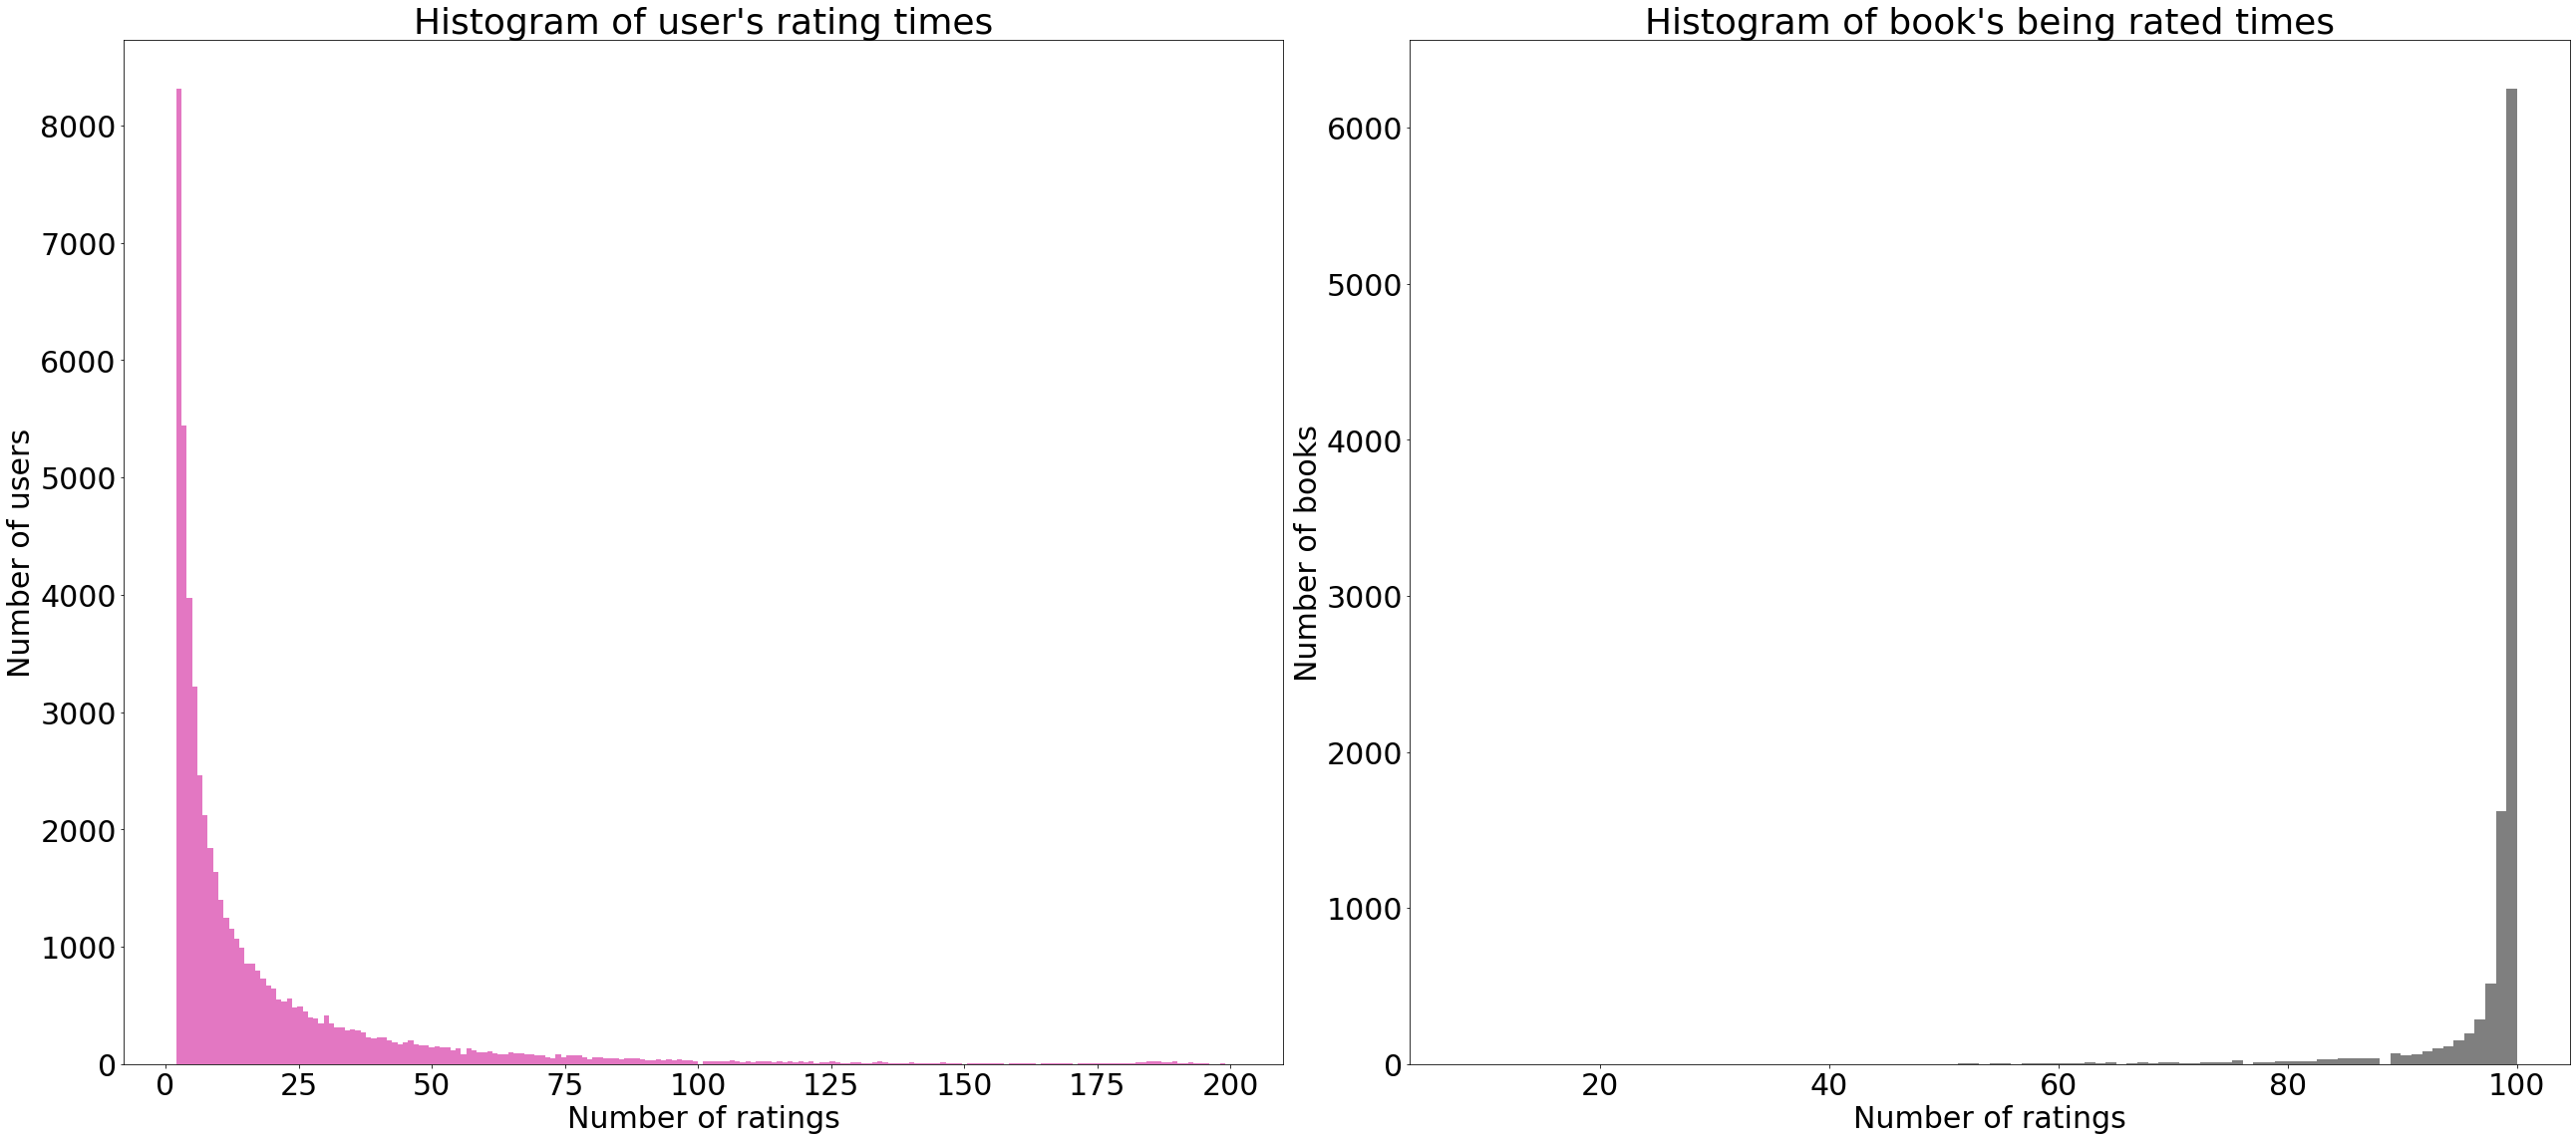

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(16)
fig.set_figwidth(36)

ax[0].hist(ratings['user_id'].value_counts(), bins=200, color='tab:pink')
ax[0].set_title("Histogram of user's rating times", fontsize=36)
ax[0].set_xlabel('Number of ratings', fontsize=30)
ax[0].set_ylabel('Number of users', fontsize=30)
ax[0].tick_params(axis='both', which='major', labelsize=30)

ax[1].hist(ratings['book_id'].value_counts(), bins=100, color='tab:gray')
ax[1].set_title("Histogram of book's being rated times", fontsize=36)
ax[1].set_xlabel('Number of ratings', fontsize=30)
ax[1].set_ylabel('Number of books', fontsize=30)
ax[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('./plot/Histogram of rating times by users and books.jpg')
plt.show()

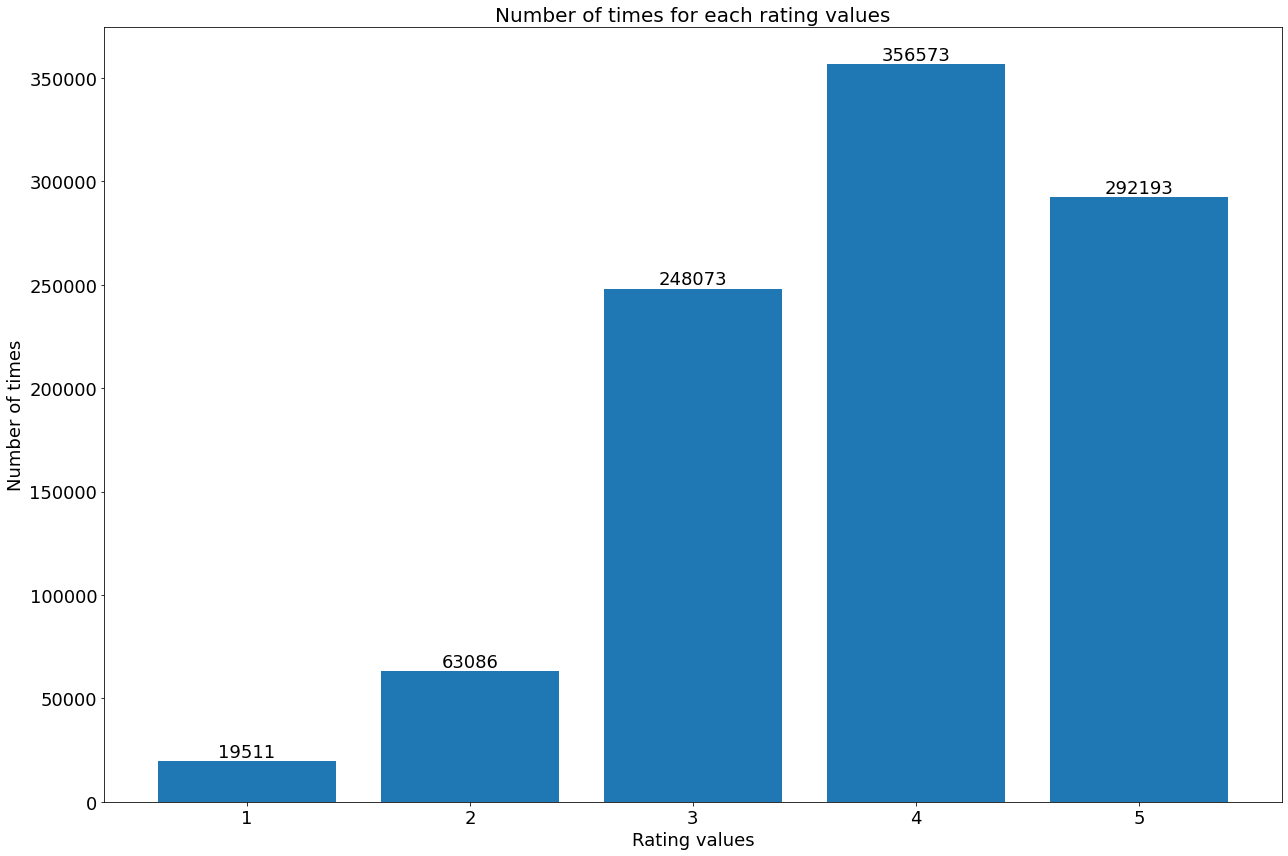

In [32]:
plt.figure(figsize=(18, 12))
tmp = ratings['rating'].value_counts()
bar = plt.bar(
    x=tmp.index,
    height=tmp.values,
    color='tab:blue'
)
plt.gca().bar_label(bar, fontsize=18)
plt.title('Number of times for each rating values', fontsize=20)
plt.ylabel('Number of times', fontsize=18)
plt.xlabel('Rating values', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('./plot/Number of times for each rating values.jpg')
plt.show()